# Open exploration

we just have to change the policy levers and save the results unless theres more you guys want to add :)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ema_workbench import Policy, ema_logging, MultiprocessingEvaluator, save_results, load_results
from problem_formulation import get_model_for_problem_formulation

In [3]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choosing the problem formulation from 0-5
dike_model, planning_steps = get_model_for_problem_formulation(2) # 5-objectives PF


In [4]:
import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

Policies to be evaluated in this open exploration: 

1. "BAU": business-as-usual, no changes
2. "Only dike": only dike heightening
3. "Only RfR": only room for the river
4. "Early evacuation" : 2 days according to the advise of analysts
4. "Initial policy debate" : the proposed policy after the first debate. RfR at Dike rings 2, 3 and 4.
5. "Final proposed policy" : RfR at Dike Rings 3 and 4. Dike heightening in 2 and 3 by 5m. 

In [8]:
def get_do_nothing_dict():
    return {l.name:0 for l in dike_model.levers}    
    
policies = [Policy("BAU",**dict(get_do_nothing_dict(),**{})),
            Policy("Only dike", **dict(get_do_nothing_dict(), 
                                            **{'A.1_DikeIncrease 0':5,
                                              'A.2_DikeIncrease 0':5,
                                              'A.3_DikeIncrease 0':5,
                                              'A.4_DikeIncrease 0':5,
                                              'A.5_DikeIncrease 0':5})),
            Policy("Only RfR", **dict(get_do_nothing_dict(), 
                                      **{'0_RfR 0':1,
                                         '1_RfR 0':1,
                                         '2_RfR 0':1,
                                         '3_RfR 0':1,
                                         '4_RfR 0':1})),
            Policy("Early evacuation", **dict(get_do_nothing_dict(),
                                      **{'EWS_DaysToThreat':2})),
            Policy("Initial policy debate", **dict(get_do_nothing_dict(), 
                                      **{'1_RfR 0':1,
                                         '2_RfR 0':1,
                                         '3_RfR 0':1})),
            Policy("Final proposed policy", **dict(get_do_nothing_dict(),
                                      **{'A.2_DikeIncrease 0':5,
                                         'A.3_DikeIncrease 0':5,
                                         '2_RfR 0':1,
                                         '3_RfR 0':1}))	] 

list_policies = policies
#according to the dike_model_function theres 3 planning steps and a 200-year horizon:
# Step 0: years 0–66
# Step 1: years 67–133
# Step 2: years 134–200
# ex to heighten a dike in step 1 and implement an RfR project in step 2. The model will simulate the outcomes for each step separately.

In [10]:
#running the model through EMA workbench 
n_scenarios = 300
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 300 scenarios * 6 policies * 1 model(s) = 1800 experiments
100%|██████████████████████████████████████| 1800/1800 [02:03<00:00, 14.63it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


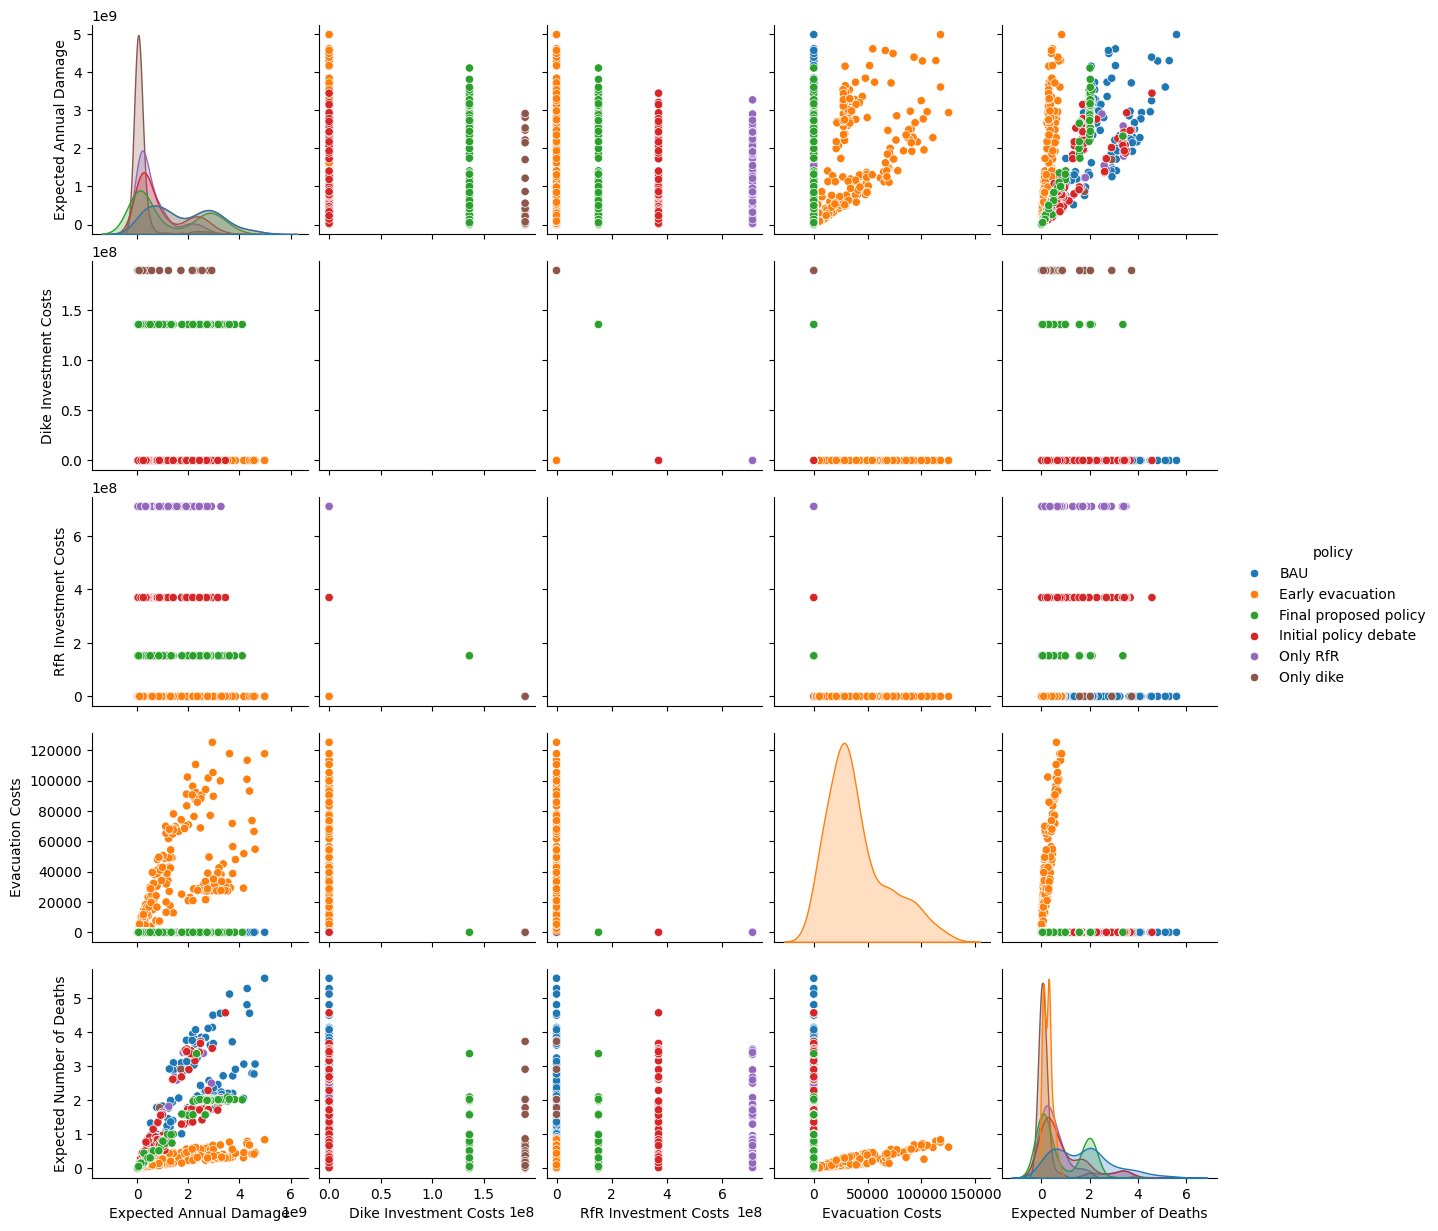

In [7]:
experiments, outcomes = results
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

plot = sns.pairplot(data, hue='policy', vars=outcomes.keys(), )
#plot.savefig()
plt.show()